In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("17-googleplaystore.csv")

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.shape

(10841, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
## missing data
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
df['Reviews'].value_counts()

Reviews
0         596
1         272
2         214
3         175
4         137
         ... 
885         1
88486       1
603         1
1195        1
398307      1
Name: count, Length: 6002, dtype: int64

In [14]:
# df['Reviews'] = df['Reviews'].astype(int) # bu kolonu şu tiple kayıt et diyoruz

In [16]:
df['Reviews'].str.isnumeric().sum() # 1 tanesi hariç hepsi numeric

np.int64(10840)

In [17]:
df[~df['Reviews'].str.isnumeric()] #false olanları gösterir ~

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [18]:
df_clean = df.copy()

In [21]:
df_clean = df_clean.drop(df_clean.index[10472])

In [23]:
df_clean['Reviews'].str.isnumeric().sum()

np.int64(10840)

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [25]:
df_clean['Reviews'] = df_clean['Reviews'].astype(int)

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [27]:
df_clean.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [28]:
df_clean['Size'].value_counts() # Varies with device: cihaza göre değişiyor

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
253k                     1
992k                     1
658k                     1
73k                      1
246k                     1
Name: count, Length: 461, dtype: int64

In [29]:
df_clean['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [30]:
# mb'ları kb'a çeviririz.
# M'yi kaldırır yanlarına 3 sıfır ekleriz.(1MB = 1000KB) K'leri de sileriz sadece

df_clean['Size'] = df_clean['Size'].str.replace("M","000")
df_clean['Size'] = df_clean['Size'].str.replace("k","")

In [31]:
df_clean['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', 'Varies with device', '9.4000', '15000', '10000',
       '1.2000', '26000', '8.0000', '7.9000', '56000', '57000', '35000',
       '54000', '201', '3.6000', '5.7000', '8.6000', '2.4000', '27000',
       '2.5000', '16000', '3.4000', '8.9000', '3.9000', '2.9000', '38000',
       '32000', '5.4000', '18000', '1.1000', '2.2000', '4.5000', '9.8000',
       '52000', '9.0000', '6.7000', '30000', '2.6000', '7.1000', '3.7000',
       '22000', '7.4000', '6.4000', '3.2000', '8.2000', '9.9000',
       '4.9000', '9.5000', '5.0000', '5.9000', '13000', '73000', '6.8000',
       '3.5000', '4.0000', '2.3000', '7.2000', '2.1000', '42000',
       '7.3000', '9.1000', '55000', '23', '6.5000', '1.5000', '7

In [34]:
df_clean['Size'] = df_clean['Size'].replace("Varies with device", np.nan)

In [35]:
df_clean['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', nan, '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000', 

In [36]:
df_clean['Size'] = df_clean['Size'].astype(float)

In [37]:
df_clean['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [38]:
df_clean.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [40]:
df_clean.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.0,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [41]:
df_clean['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [42]:
df_clean['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [43]:
df_clean['Price'].value_counts()

Price
0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$3.61          1
$394.99        1
$1.26          1
$1.20          1
$1.04          1
Name: count, Length: 92, dtype: int64

In [44]:
df_clean['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [45]:
chars_to_remove = ["+",",","$"]
cols_to_clean = ["Installs" , "Price"]

In [46]:
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_clean[cols] = df_clean[cols].str.replace(item,"")

In [47]:
df_clean['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [48]:
df_clean['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [51]:
df_clean['Price'] = df_clean['Price'].astype(float)

In [52]:
df_clean['Installs'] = df_clean['Installs'].astype(int)

In [53]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [54]:
df_clean.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,19579.419913,1.546434e+07,0.961808
std,0.515219,2.927761e+06,24042.062020,8.502936e+07,15.896932
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.600000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [55]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [56]:
# tarih kolonları
df_clean['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10840, dtype: object

In [57]:
df_clean['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [58]:
df_clean['Last Updated'] = pd.to_datetime(df_clean['Last Updated'])

In [59]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [60]:
df_clean['Day'] = df_clean['Last Updated'].dt.day
df_clean['Month'] = df_clean['Last Updated'].dt.month
df_clean['Year'] = df_clean['Last Updated'].dt.year

In [61]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [63]:
df_clean.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.0,10000000,Free,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device,25,7,2018


# temizlik bitti EDA geçebiliriz.

In [65]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [70]:
# aynı isimden appler var mı?
df_clean[df_clean.duplicated('App')].shape

(1181, 16)

In [71]:
df_clean = df_clean.drop_duplicates(subset = ['App'], keep ='first')

In [72]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Day             9659 non-null   int32         
 14  Month           9659 non-null   int32         
 15  Year    

In [73]:
df_clean.shape

(9659, 16)

In [79]:
numeric_features = [feature for feature in df_clean.columns if df_clean[feature].dtype != 'O']
categorical_features = [feature for feature in df_clean.columns if df_clean[feature].dtype == 'O']

In [80]:
print(numeric_features)

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']


In [81]:
print(categorical_features)

['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


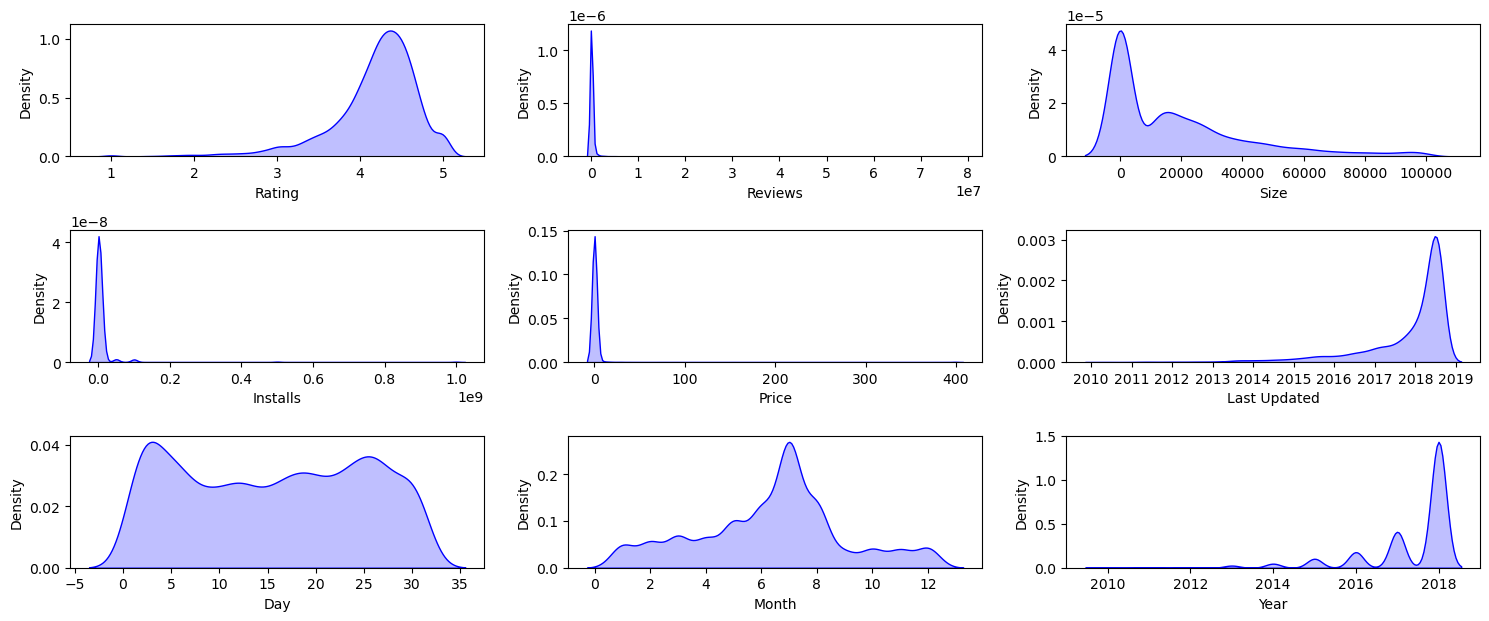

In [87]:
plt.figure(figsize=(15,10))

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = df_clean[numeric_features[i]], color = "b",fill=True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
plt.show()

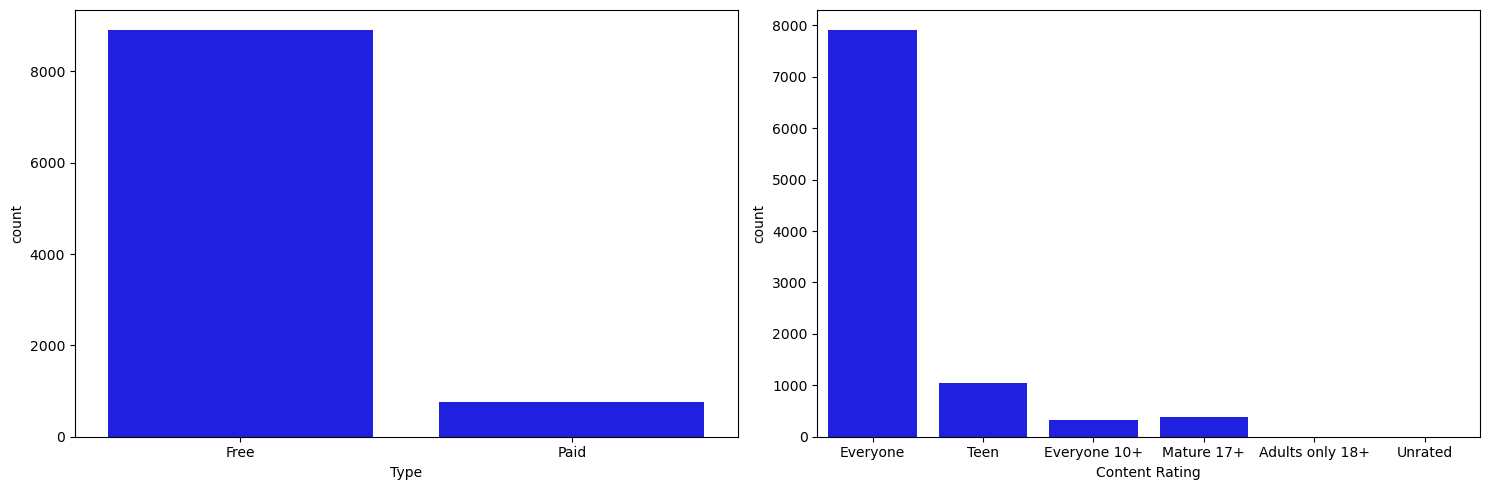

In [92]:
plt.figure(figsize=(15,5))
category = ["Type", "Content Rating"]

for i in range(0, len(category)):
    plt.subplot(1, 2, i+1)
    sns.countplot(x = df_clean[category[i]], color = "b",fill=True)
    plt.xlabel(category[i])
    plt.tight_layout()
plt.show()

In [93]:
df_clean["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [95]:
df_clean["Category"].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [96]:
# top app categories by installment

In [105]:
df_category_ınstalls = df_clean.groupby(["Category"])["Installs"].sum().sort_values(ascending = False).reset_index()

In [106]:
df_category_ınstalls

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


In [108]:
df_category_ınstalls["Installs"] = df_category_ınstalls["Installs"]/1000000000

In [109]:
df_category_ınstalls

,Category,Installs
0,GAME,13.878924
1,COMMUNICATION,11.038276
2,TOOLS,8.001772
3,PRODUCTIVITY,5.793091
4,SOCIAL,5.487868
5,PHOTOGRAPHY,4.649148
6,FAMILY,4.427942
7,VIDEO_PLAYERS,3.926903
8,TRAVEL_AND_LOCAL,2.894887
9,NEWS_AND_MAGAZINES,2.369218


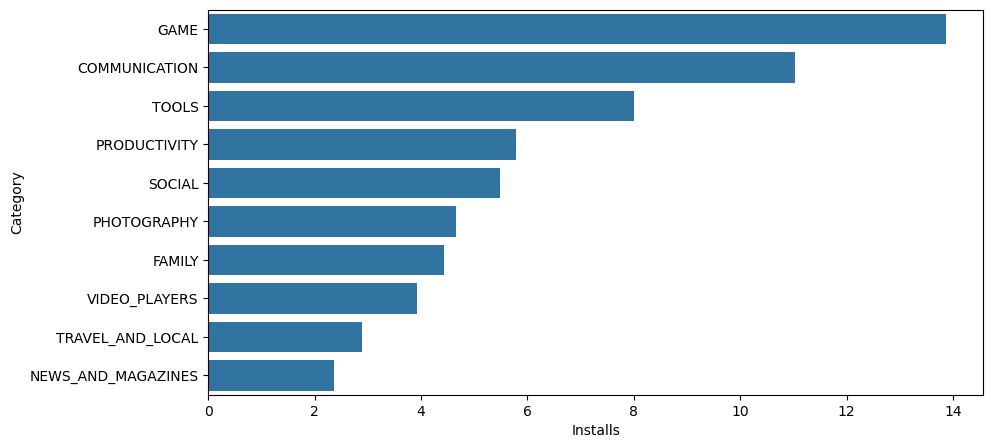

In [110]:
# top 10 categories by install
df2 = df_category_ınstalls.head(10)
plt.figure(figsize=(10,5))

sns.barplot(x="Installs",y="Category", data=df2)
plt.show()

In [111]:
# top 5 app in categories

In [112]:
apps = ["GAME","COMMUNICATION","TOOLS","PRODUCTIVITY","SOCIAL"]

In [118]:
df_app_category = df_clean.groupby(["Category","App"])["Installs"].sum().reset_index()

In [119]:
df_app_category.sort_values("Installs",ascending = False)

,Category,App,Installs
9342,TRAVEL_AND_LOCAL,Maps - Navigate & Explore,1000000000
1534,ENTERTAINMENT,Google Play Games,1000000000
9496,VIDEO_PLAYERS,Google Play Movies & TV,1000000000
6388,NEWS_AND_MAGAZINES,Google News,1000000000
1145,COMMUNICATION,Skype - free IM & video calls,1000000000
...,...,...,...
547,BUSINESS,CX Network,0
3661,FINANCE,Eu Sou Rico,0
2211,FAMILY,Command & Conquer: Rivals,0
3662,FINANCE,Eu sou Rico,0


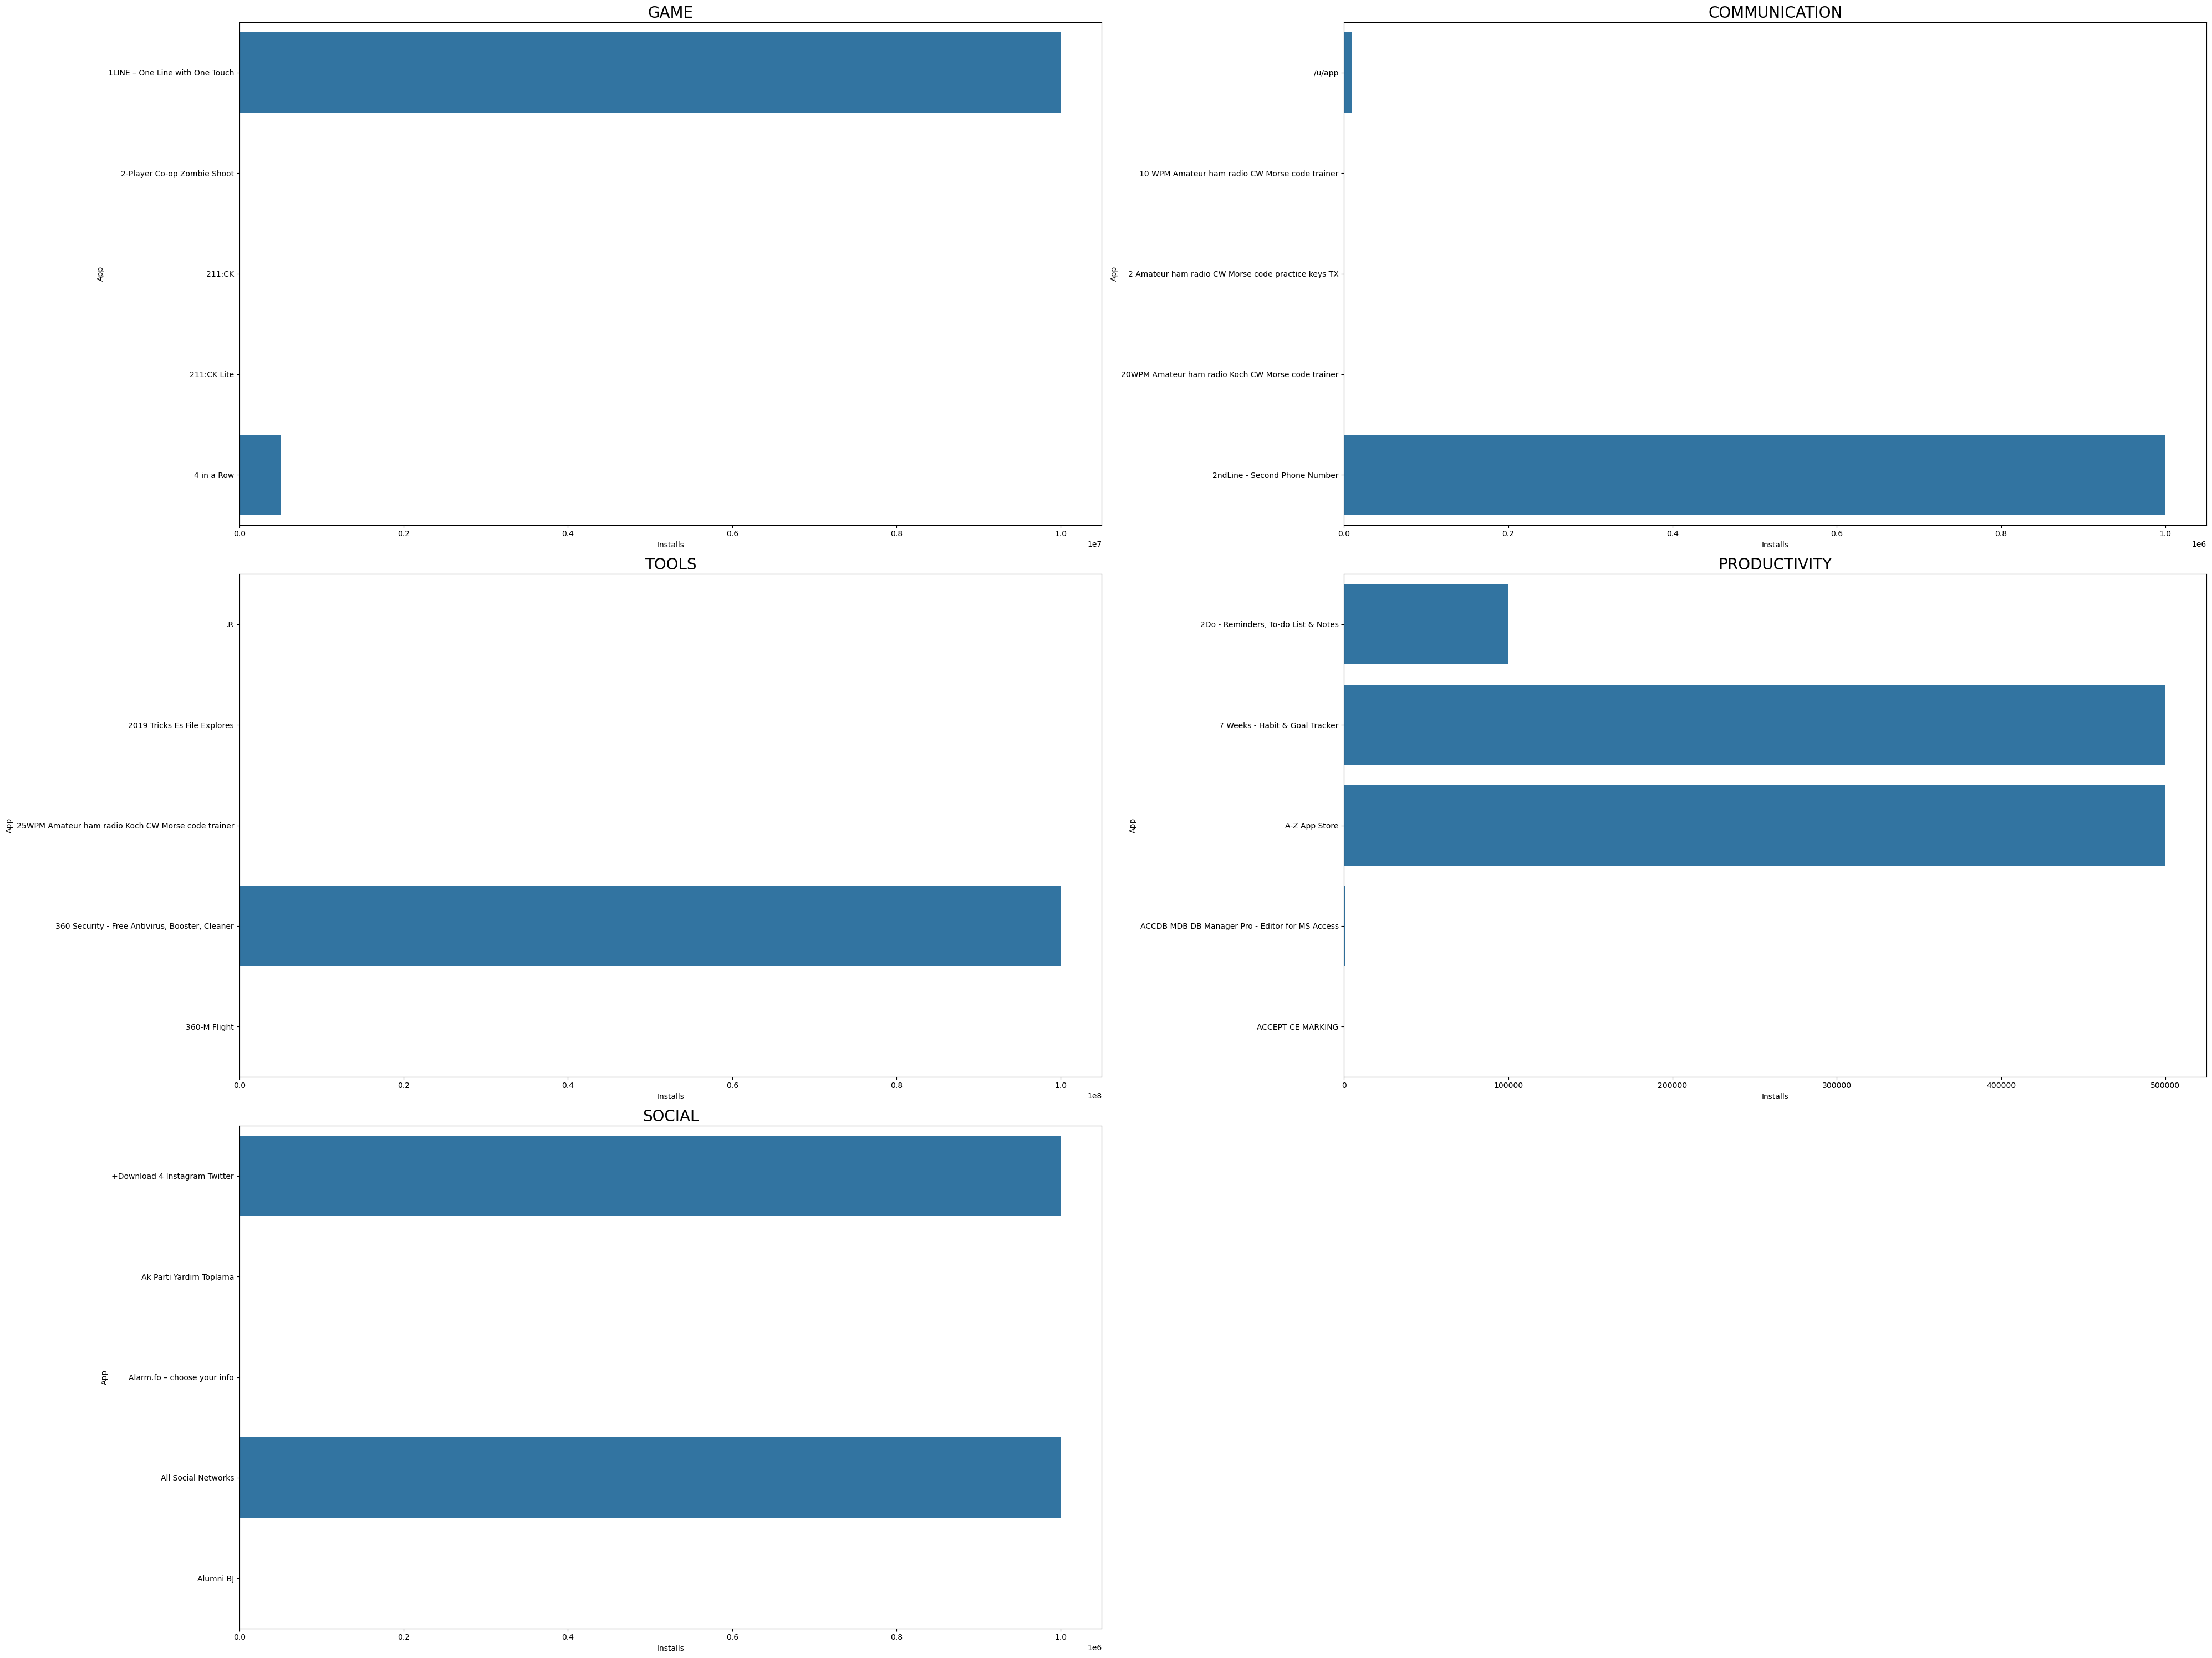

In [129]:
apps = ["GAME","COMMUNICATION","TOOLS","PRODUCTIVITY","SOCIAL"]
plt.figure(figsize=(40,30))
for i, app in enumerate(apps):
    df2 = df_app_category[df_app_category.Category == app]
    df2 = df2.head(5)
    #print(df2)

    plt.subplot(3,2, i+1)
    sns.barplot(data=df2,x="Installs",y="App")
    plt.title(app, size=20)
plt.tight_layout()
plt.show()

In [130]:
df2

,Category,App,Installs
7807,SOCIAL,+Download 4 Instagram Twitter,1000000
7808,SOCIAL,Ak Parti Yardım Toplama,0
7809,SOCIAL,Alarm.fo – choose your info,1000
7810,SOCIAL,All Social Networks,1000000
7811,SOCIAL,Alumni BJ,100


In [131]:
# 5 rating apps

In [136]:
rating_df = df_clean.groupby(["Category","App"])["Rating"].sum().sort_values(ascending=False).reset_index()

In [139]:
rating_df

,Category,App,Rating
0,FAMILY,Exam Result BD,5.0
1,FAMILY,Fr. Mike Schmitz Audio Teachings,5.0
2,FAMILY,Fr. Daoud Lamei,5.0
3,FAMILY,Foothills CP,5.0
4,FAMILY,Florida Wildflowers,5.0
...,...,...,...
9654,HOUSE_AND_HOME,EC-Contractors,0.0
9655,HOUSE_AND_HOME,EyPools,0.0
9656,HEALTH_AND_FITNESS,be'ah,0.0
9657,HEALTH_AND_FITNESS,Kick Axe Bx,0.0


In [140]:
top_rated_apps = rating_df[rating_df["Rating"] == 5.0]

In [141]:
top_rated_apps.shape

(271, 3)

In [142]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Day             9659 non-null   int32         
 14  Month           9659 non-null   int32         
 15  Year    

In [144]:
df_clean["Android Ver"]

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10836            4.1 and up
10837            4.1 and up
10838            2.2 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 9659, dtype: object

In [145]:
df_clean["Android Ver"] = df_clean["Android Ver"].replace("and up","",regex=True) 
# regular expressions: yüzde bilmem kaç içinde şu geçenleri bul gibi (üssü olarsa harici)

In [146]:
df_clean["Android Ver"]

0                    4.0.3 
1                    4.0.3 
2                    4.0.3 
3                      4.2 
4                      4.4 
                ...        
10836                  4.1 
10837                  4.1 
10838                  2.2 
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 9659, dtype: object

In [150]:
df_clean["Android Ver"] = df_clean["Android Ver"].replace("Varies with device","",regex=True).replace("W","",regex=True).replace("",np.nan)

In [151]:
df_clean["Android Ver"].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       nan, '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ',
       '5.1 ', '4.3 ', '4.0.3 - 7.1.1', '2.0 ', '3.2 ', '7.1 ',
       '7.0 - 7.1.1', '8.0 ', '5.0 - 8.0', '3.1 ', '2.0.1 ',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 ', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

In [154]:
df_clean["Android Ver"].value_counts().reset_index()

,Android Ver,count
0,4.1,2202
1,4.0.3,1395
2,4.0,1285
3,4.4,829
4,2.3,616
5,5.0,512
6,4.2,372
7,2.3.3,273
8,2.2,239
9,3.0,231


In [156]:
df_clean = df_clean[df_clean["Android Ver"].str.contains("-") == False]

In [158]:
df_clean["Android Ver"].value_counts()

Android Ver
4.1       2202
4.0.3     1395
4.0       1285
4.4        829
2.3        616
5.0        512
4.2        372
2.3.3      273
2.2        239
3.0        231
4.3        221
2.1        133
1.6        116
6.0         54
7.0         42
3.2         36
2.0         32
5.1         22
1.5         20
3.1         10
2.0.1        7
8.0          6
7.1          3
1.0          2
Name: count, dtype: int64

In [159]:
df_clean["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education', 'Education;Creativity', 'Education;Education',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity', 'Simulation',
       'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Simulation;Education', 'Action;Action & Adven

In [160]:
df_clean.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1,18,6,2017
10835,FR Forms,BUSINESS,NaN,0,9.6,10,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0,29,9,2016
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2,20,1,2017


In [162]:
mean_genres_installs = df_clean.groupby(["Genres"])["Installs"].mean()/1000000

In [163]:
mean_genres_installs

Genres
Action                                   11.255844
Action;Action & Adventure                 3.910955
Adventure                                 4.064319
Adventure;Action & Adventure             21.230000
Adventure;Brain Games                     0.100000
                                           ...    
Video Players & Editors                   7.093219
Video Players & Editors;Creativity        5.000000
Video Players & Editors;Music & Video     5.000000
Weather                                   2.270176
Word                                      5.208628
Name: Installs, Length: 117, dtype: float64

In [164]:
mean_genres_installs = mean_genres_installs.to_dict()

In [165]:
mean_genres_installs

{'Action': 11.255844429065743,
 'Action;Action & Adventure': 3.9109545454545454,
 'Adventure': 4.064319452054795,
 'Adventure;Action & Adventure': 21.23,
 'Adventure;Brain Games': 0.1,
 'Adventure;Education': 10.0,
 'Arcade': 20.540684218390805,
 'Arcade;Action & Adventure': 2.7084616153846155,
 'Arcade;Pretend Play': 1.0,
 'Art & Design': 1.8308589285714287,
 'Art & Design;Action & Adventure': 0.1,
 'Art & Design;Creativity': 0.285,
 'Art & Design;Pretend Play': 0.5,
 'Auto & Vehicles': 0.5753873205128205,
 'Beauty': 0.303941,
 'Board': 2.859415641025641,
 'Board;Action & Adventure': 2.001666666666667,
 'Board;Brain Games': 0.5254733333333333,
 'Board;Pretend Play': 0.0001,
 'Books & Reference': 0.6850892182741116,
 'Books & Reference;Creativity': 0.0001,
 'Books & Reference;Education': 0.0055,
 'Business': 1.0347099612403101,
 'Card': 2.200636585365854,
 'Card;Action & Adventure': 5.5,
 'Casino': 2.980018918918919,
 'Casual': 17.919875741935485,
 'Casual;Action & Adventure': 4.909181

In [166]:
df_clean["Genres Encoded"] = df_clean["Genres"].map(mean_genres_installs)

C:\Users\Dilanur\AppData\Local\Temp\ipykernel_5560\946894975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Genres Encoded"] = df_clean["Genres"].map(mean_genres_installs)


In [167]:
df_clean["Genres Encoded"]

0        1.830859
1        0.500000
2        1.830859
3        1.830859
4        0.285000
           ...   
10834    0.360664
10835    1.034710
10836    0.360664
10837    0.360664
10838    0.092978
Name: Genres Encoded, Length: 8658, dtype: float64